In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import pandas as pd
import scipy.stats as stats
import scipy.stats as st
import scipy.special as scpysp
import scipy.special as sp
from scipy import stats
from scipy.stats import t

DATASET 2: Crime

In [2]:
#read dataset
data = pd.read_csv('dataset/crime.csv',encoding='iso-8859-1',low_memory = False)

Min ,Max ,Mean ,Std ,Mode ,Median ,Var ,Skew ,Kurtosis

In [3]:
#Simpan data yang dimanipulasi
manps = data

# Mendapatkan min, max, mean, std
data.describe() 

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
25%        42.297466     -71.097081  
50%        42.325552     -71.077493  
75%        42.348624     -71.062482  
max        42.395042      -1.000000

In [4]:
data.mode()

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0      I162030584        3006.0  Motor Vehicle Accident Response   
1             NaN           NaN                              NaN   

             OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0  SICK/INJURED/MEDICAL - PERSON       B2                       Y   
1                            NaN      NaN            NaN      NaN   

      OCCURRED_ON_DATE    YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2016-08-01 00:00:00  2017.0    8.0      Friday  17.0  Part Three   
1  2017-06-01 00:00:00     NaN    NaN         NaN   NaN         NaN   

          STREET        Lat       Long                  Location  
0  WASHINGTON ST  42.348624 -71.082776  (0.00000000, 0.00000000)  
1            NaN        NaN        NaN                       NaN

In [5]:
data.median()

OFFENSE_CODE    2907.000000
YEAR            2017.000000
MONTH              7.000000
HOUR              14.000000
Lat               42.325552
Long             -71.077493
dtype: float64

In [6]:
data.var()

OFFENSE_CODE    1.404201e+06
YEAR            1.019645e+00
MONTH           1.058841e+01
HOUR            3.959825e+01
Lat             4.724085e+00
Long            1.236107e+01
dtype: float64

In [7]:
data.skew()

OFFENSE_CODE    -0.410645
YEAR            -0.083805
MONTH           -0.119591
HOUR            -0.482938
Lat            -19.827352
Long            19.831624
dtype: float64

In [8]:
data.kurtosis()

OFFENSE_CODE     -1.415226
YEAR             -1.090411
MONTH            -1.035742
HOUR             -0.600736
Lat             391.211516
Long            391.324226
dtype: float64

Plot Data dengan Hist dan Boxplot

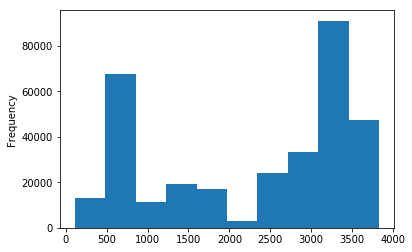

In [9]:
data['OFFENSE_CODE'].plot(kind = 'hist')

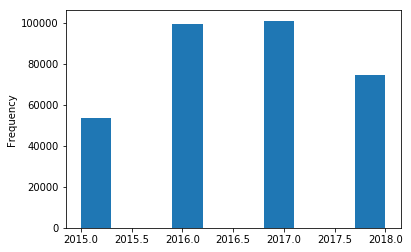

In [10]:
data['YEAR'].plot(kind = 'hist')

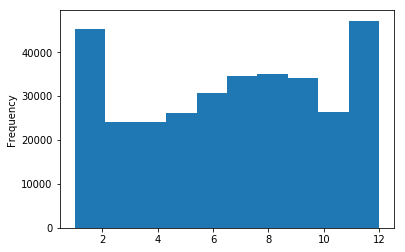

In [11]:
data['MONTH'].plot(kind = 'hist')

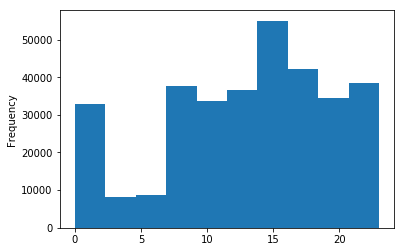

In [12]:
data['HOUR'].plot(kind = 'hist')

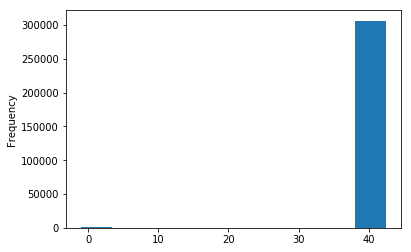

In [13]:
data['Lat'].plot(kind = 'hist')

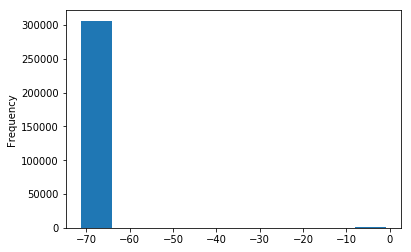

In [14]:
data['Long'].plot(kind = 'hist')

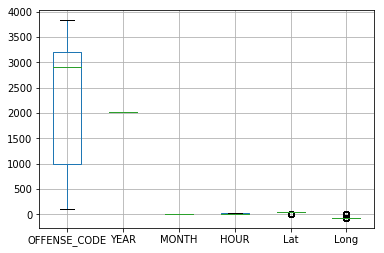

In [15]:
data.boxplot()

In [16]:
#Ubah NaN menjadi N
manps.loc[manps.SHOOTING.isna(), 'SHOOTING'] = 'N'
manps.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   
3      I182080051           413  Aggravated Assault   
4      I182080050          3122            Aircraft   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495        N   
1                 PROPERTY - LOST      D14            795        N   
2       THREATS TO DO BODILY HARM       B2            329        N   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92        N   
4              AIRCRAFT INCIDENTS       A7             36        N   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   

         STREET        Lat       Long                     Location  
0  ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)  
1    ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)  
2      DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)  
3  CAMBRIDGE ST  42.359454 -71.059648  (42.35945371, -71.05964817)  
4   PRESCOTT ST  42.375258 -71.024663  (42.37525782, -71.02466343)

No 1 a

In [17]:
p = float(len(manps.loc[manps["OFFENSE_CODE_GROUP"] == "Homicide"]))/float(len(manps))

print('Ekspektasi = '+str(p*1000)+', atau dibulatkan menjadi = '+str(round(p*1000)))

Ekspektasi = 0.503324995424, atau dibulatkan menjadi = 1.0


No 1 b

In [18]:
p = float(len(manps.loc[((manps["OFFENSE_CODE_GROUP"] == "Homicide") & (manps["SHOOTING"] == 'N'))]))/float(len(manps))

print('Ekspektasi = '+str(p*1000)+', atau dibulatkan menjadi = '+str(round(p*1000)))

Ekspektasi = 0.128119089744, atau dibulatkan menjadi = 0.0


No 1 c

In [19]:
p = float(len(manps.loc[((manps["HOUR"] == 20) & (manps['DAY_OF_WEEK'] == 'Saturday'))]))/float(len(manps))

print('Ekspektasi = '+str(p*1000)+', atau dibulatkan menjadi = '+str(round(p*1000)))

Ekspektasi = 6.68354584833, atau dibulatkan menjadi = 7.0


No 2 a

In [20]:
p = float(len(manps.loc[((manps["STREET"] == 'Geneva Ave') & (manps["STREET"] == 'Prescott Street'))]))/float(len(manps))

print('Ekspektasi = '+str(p*2000)+', atau dibulatkan menjadi = '+str(round(p*2000)))

Ekspektasi = 0.0, atau dibulatkan menjadi = 0.0


No 2 b

In [21]:
p = float(len(manps.loc[((manps["DISTRICT"] == 'E18') & (manps["REPORTING_AREA"] == 495))]))/float(len(manps))

print('Ekspektasi = '+str(p*2000)+', atau dibulatkan menjadi = '+str(round(p*2000)))

Ekspektasi = 0.0, atau dibulatkan menjadi = 0.0


No 2 c

In [22]:
p = float(len(manps.loc[((manps['DAY_OF_WEEK'] != 'Sunday') & (manps['DAY_OF_WEEK'] != 'Saturday'))]))/float(len(manps))

print('Ekspektasi = '+str(p*2000)+', atau dibulatkan menjadi = '+str(round(p*2000)))

Ekspektasi = 1467.12830212, atau dibulatkan menjadi = 1467.0


    DATASET 3: Black Friday 

In [23]:
#read dataset
data = pd.read_csv('dataset/black_friday.csv', header = None)

Mendapatkan min, max, mean, std

In [24]:
# Mendapatkan min, max, mean, std
data.describe() 

0
count  537577.000000
mean     9333.859853
std      4981.022133
min       185.000000
25%      5866.000000
50%      8062.000000
75%     12073.000000
max     23961.000000

In [25]:
data.mode()

0
0  6855

In [26]:
data.median()

0    8062.0
dtype: float64

In [27]:
data.var()

0    2.481058e+07
dtype: float64

In [28]:
data.skew()

0    0.62428
dtype: float64

In [29]:
data.kurtosis()

0   -0.343121
dtype: float64

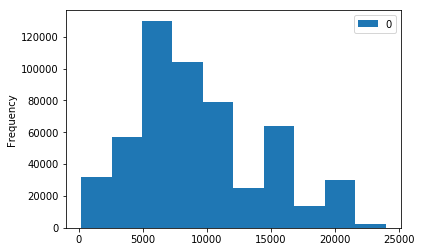

In [30]:
data.plot(kind = 'hist')

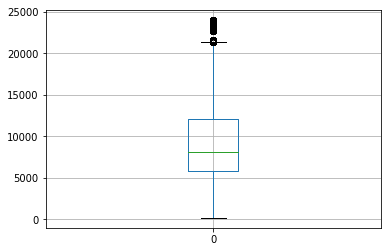

In [31]:
data.boxplot()

Menggunakan distribusi binomial karena antara 2 jawaban

1 a

In [32]:
p = float(len(data.loc[data[0] < 1000])) / float(len (data) * 250)

print('Ekspektasi = '+str(p)+', atau dibulatkan menjadi = '+str(round(p)))

Ekspektasi = 5.24129566555e-05, atau dibulatkan menjadi = 0.0


1 b

In [33]:
p = float(len(data.loc[data[0] > 10000])) / float(len (data) * 250)

print('Ekspektasi = '+str(p)+', atau dibulatkan menjadi = '+str(round(p)))

Ekspektasi = 0.00138887638422, atau dibulatkan menjadi = 0.0


1 c

In [34]:
p = float(len(data.loc[data[0] > 20000])) / float(len (data) * 250)

print('Ekspektasi = '+str(p)+', atau dibulatkan menjadi = '+str(round(p)))

Ekspektasi = 9.31215435184e-05, atau dibulatkan menjadi = 0.0


2 a

In [35]:
p = float(len(data.loc[(data[0] >= 1980) & (data[0] <= 2000)])) / float(len (data) * 1000)

print('Ekspektasi = '+str(p)+', atau dibulatkan menjadi = '+str(round(p)))

Ekspektasi = 1.23517189165e-06, atau dibulatkan menjadi = 0.0


2 b

In [36]:
p = float(len(data.loc[(data[0] >= 2707) & (data[0] <= 2897)])) / float(len (data) * 1000)

print('Ekspektasi = '+str(p)+', atau dibulatkan menjadi = '+str(round(p)))

Ekspektasi = 7.17478612366e-06, atau dibulatkan menjadi = 0.0


DATASET 4: Crypto

In [37]:
#read dataset
data = pd.read_csv('dataset/crypto.csv', header = None)

Min ,Max ,Mean ,Std ,Mode ,Median ,Var ,Skew ,Kurtosis

In [38]:
# Mendapatkan min, max, mean, std
data.describe() 

0
count  6.322180e+05
mean   2.030181e+02
std    8.678734e+03
min    2.925000e-09
25%    8.070000e-04
50%    9.733500e-03
75%    1.198202e-01
max    2.383502e+06

In [39]:
data.mean()

0    203.018146
dtype: float64

In [40]:
data.mode()

0
0  0.000002

In [41]:
data.median()

0    0.009734
dtype: float64

In [42]:
data.var()

0    7.532042e+07
dtype: float64

In [43]:
data.skew()

0    118.239608
dtype: float64

In [44]:
data.kurtosis()

0    22297.470843
dtype: float64

Plot Data dengan Hist dan Boxplot

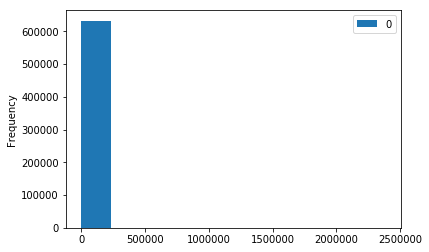

In [45]:
data.plot(kind = 'hist')

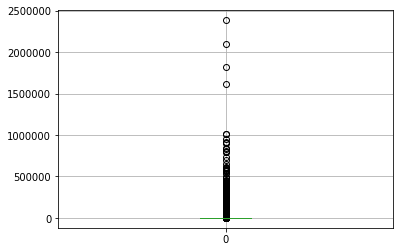

In [46]:
data.boxplot()

Dapat dilihat dari data bahwa berbentuk eksponensial maka menggunakan distrribusi gamma,
Tiap jawaban bisa menggunakan alpha dan beta berbeda sehingga membandingkan antara 3 data,
yaitu data asli data distribusi gamma hasil fit dan gamma dari hasil seleksi.

In [47]:
#Fiting alpha beta
param = stats.gamma.fit(data[0],loc=0)
alpha = param[0]
beta = param[2]
alpha,beta

(0.26838232070787427, 118.86394010199717)

Seleksi Data

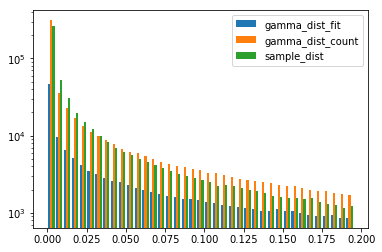

In [48]:
seleksi = data.sort_values([0])
seleksi = seleksi[:575000]
seleksi.describe()

beta_s = seleksi[0].var()/seleksi[0].mean()
alpha_s = seleksi[0].mean()/beta_s
alpha_s,beta_s

x_gammas = np.random.gamma(alpha,beta,len(data.index))
x_gammas_seleksi = np.random.gamma(alpha_s,beta_s,len(data.index))

plt.hist([x_gammas,x_gammas_seleksi,data[0]],bins = np.arange(0,0.2,0.005),label=['gamma_dist_fit','gamma_dist_count','sample_dist'],log=True)
plt.legend(loc="upper right")
plt.show()

No 1 a

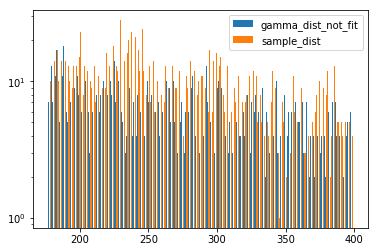

In [49]:
round(1000*(scpysp.gammainc(alpha_s,0.177*beta_s)))

seleksi = data.sort_values([0])
seleksi = seleksi[500000:]
seleksi.describe()

beta_s = seleksi[0].var()/seleksi[0].mean()
alpha_s = seleksi[0].mean()/beta_s
alpha_s,beta_s

x_gammas_seleksi = np.random.gamma(alpha_s,beta_s,len(data.index))

plt.hist([x_gammas_seleksi,data[0]],bins = np.arange(177,400,1),label=['gamma_dist_not_fit','sample_dist'],log=True)
plt.legend(loc="upper right")
plt.show()

No 1 b

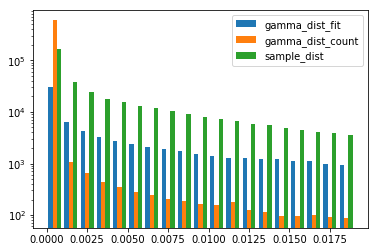

In [50]:
1000*(1-scpysp.gammainc(alpha_s,177.013*beta_s))

seleksi = data.sort_values([0])
seleksi = seleksi[:600000]
seleksi.describe()

x_gammas_seleksi = np.random.gamma(alpha_s,beta_s,len(data.index))

plt.hist([x_gammas,x_gammas_seleksi,data[0]],bins = np.arange(0,0.02,0.001),label=['gamma_dist_fit','gamma_dist_count','sample_dist'],log=True)
plt.legend(loc="upper right")
plt.show()

No 2 a

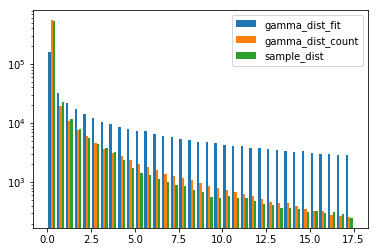

In [51]:
1 - scpysp.gammainc(alpha,0.013*beta)

seleksi = data.sort_values([0])
seleksi = seleksi[:620000]
beta_s = seleksi[0].var()/seleksi[0].mean()
alpha_s = seleksi[0].mean()/beta_s
x_gammas_count = np.random.gamma(alpha_s,beta_s,len(data.index))

plt.hist([x_gammas,x_gammas_count,data[0]],bins = np.arange(0,18,0.5),label=['gamma_dist_fit','gamma_dist_count','sample_dist'],log=True)
plt.legend(loc="upper right")
plt.show()

No 2 b

In [52]:
scpysp.gammainc(alpha_s,17.7*beta_s)

1.0

DATASET 5: Athletes

In [53]:
#read dataset
data = pd.read_csv('dataset/athletes.csv')

In [54]:
# Mendapatkan min, max, mean, std
data['Medal'].describe() 

count    134731.000000
mean          0.295277
std           0.724716
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          28.000000
Name: Medal, dtype: float64

In [55]:
data['Medal'].mode()

0    0
dtype: int64

In [56]:
data['Medal'].median()

0.0

In [57]:
data['Medal'].var()

0.5252132778007574

In [58]:
data['Medal'].skew()

4.8199987845312

In [59]:
data['Medal'].kurtosis()

51.562525836059855

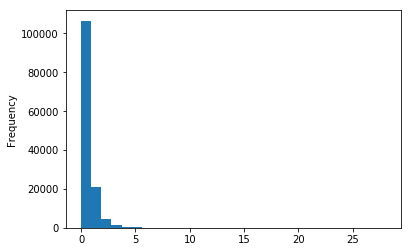

In [60]:
data['Medal'].plot.hist(bins=30)

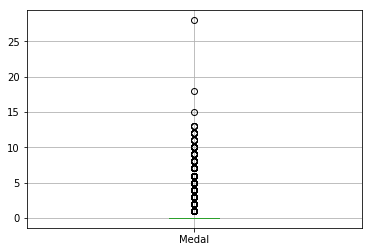

In [61]:
data.boxplot()

Akan dicoba dilihat kemiripan plotting data dengan distribusi gamma

In [62]:
# alfa * beta = mean
# alfa * beta * beta = var

beta = data['Medal'].var() / data['Medal'].mean()
alfa = data['Medal'].mean() / beta;
alfa, beta

(0.1660061953723104, 1.7787122673346367)

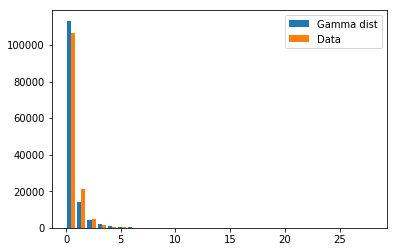

In [63]:
x_gamma = pd.DataFrame(np.random.gamma(alfa,beta,len(data.index)))
plt.hist([x_gamma[0].round(),data['Medal']],bins=30,label=["Gamma dist","Data"])
plt.legend(loc = 'upper right')
plt.show()

Dari plotting di atas, terlihat data cukup mirip dengan distribusi gamma, sehingga dipilih fungsi distribusi yaitu gamma

Soal a.1
Pada soal a.1, diketahui peluang seseorang tidak pernah mendapatkan medali (0 medali) yaitu X<=0.5 (dengan galat).
Maka peluangnya dapat dihitung dengan distribusi gamma F(0.5) = g(alfa, 0.5*beta) / Gamma(alfa).

In [64]:
sp.gammainc(alfa,0.5*beta)

0.9495725310243279

Soal a.ii
Pada soal a. ii, nilai x>=10+0.5, sehingga
P(x=>10.5) = 1 - P(x<=10.5)

In [65]:
1 - sp.gammainc(alfa,10.5*beta)

1.156553741665789e-10

Soal a.iii
Peluang x tepat 3 medali berarti
P (2.5<=x<=3.5)

In [66]:
sp.gammainc(alfa ,3.5*beta) - sp.gammainc(alfa,2.5*beta)

0.0004516462780106423

Soal a.iv. Peluang tepat 1 atau 5 medali, yaitu
P(0.5<=x<=1.5)+P(4.5<=x<=5.5)

In [67]:
sp.gammainc(alfa ,1.5*beta) - sp.gammainc(alfa,0.5*beta) + sp.gammainc(alfa ,5.5*beta) - sp.gammainc(alfa,4.5*beta)

0.04605229515401199

Soal b. confidence interval 95%
Selanjutnya adalah menentukan confidence interval 95%

In [68]:
confidence = 0.95
n = len(data.index)
mean = data['Medal'].mean()
std = stats.sem(data['Medal'].values)
h = std * t.ppf((1 + confidence) / 2, n - 1)
print("lower: ",str(mean-h))
print("upper: ",str(mean+h))

('lower: ', '0.29140747795632177')
('upper: ', '0.29914703436823603')
